In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

import pickle
import yaml
import numpy as np
from RetaredHarmonicDynamics import animate_particle
from matplotlib import animation
from scipy.stats import moment
from scipy.special import factorial, lambertw, erf
from pathlib import Path

tensor = torch.tensor

from my_functions import get_pos, get_mean_std, FokkerPlankCalculator, time_delayed_harmonic, damped_harmonic_oszillator
from my_functions import get_approx_freq,get_zero, get_pos_with_border, get_pos_mirror

pic_path = Path('Graphic_Results/')

save_run = True

In [3]:
# Escape_rate_mirrored_min_min and EscapeRate_mirroed musst run first

In [4]:
num_res_folder_names = ['tau0','tau005', 'tau01', 'tau015']

num_res_folders = {k:Path('nummeric_results')/k for k in num_res_folder_names}

#num_res_folder = Path('nummeric_results/tau0/')
std_parameter_setting = {}
this_tau = {}
for key, num_res_folder in num_res_folders.items():
    with open(num_res_folder/'std_parameter_setting.yaml') as f:
        std_parameter_setting[key] = yaml.load(f , Loader=yaml.SafeLoader)
    this_tau[key] = std_parameter_setting[key]['tau']

In [5]:
crossings_min_bound = {}
crossings_zero_bound = {}
for key, num_res_folder in num_res_folders.items():
    with open(num_res_folder/'crossings_min_bound.pkl', 'rb') as f:
        crossings_min_bound.update(pickle.load(f))
    with open(num_res_folder/'crossings_zero_bound.pkl', 'rb') as f:
        crossings_zero_bound.update(pickle.load(f))

In [6]:
crossings_min_bound

{0: tensor([9.8140e+03, 1.8500e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 0.05: tensor([9.7970e+03, 2.0200e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 0.1: tensor([9.6970e+03, 3.0100e+02, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 0.15: tensor([9.5670e+03, 4.3100e+02, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])}

In [9]:
np.linspace(*xlim,xlim[1], endpoint=False)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

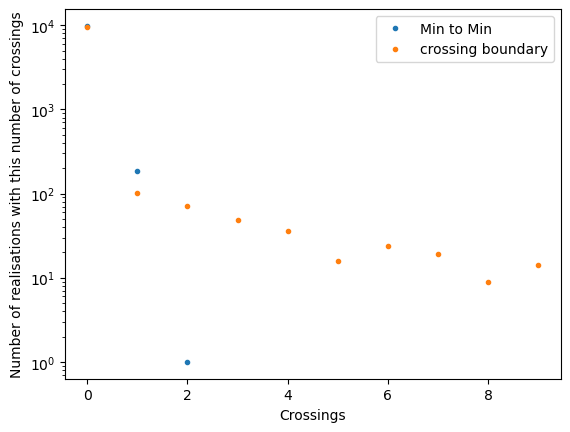

In [16]:
single_tau = 0
xlim  = (0,10)
plt.plot(np.linspace(*xlim,xlim[1], endpoint = False),crossings_min_bound[single_tau][:xlim[1]],'.', label='Min to Min')
plt.plot(np.linspace(*xlim,xlim[1], endpoint = False),crossings_zero_bound[single_tau][:xlim[1]],'.', label='crossing boundary')
plt.legend()
plt.xlabel('Crossings')
plt.ylabel('Number of realisations with this number of crossings')
plt.yscale('log')
if save_run:
    plt.savefig('Graphic_Results/number_of_crossings_tau0.pdf')

In [12]:
# num_particle = 20000
# max_t = 2
# dt = 1e-3

# tau = 0.1
# k = 12
# border = 1.5e-3

max_t = std_parameter_setting['tau0']['max_t']


sime_res_bound_zero = {}
sime_res_bound_min = {}
sim_res_abs = {}
bullerjahn = {}
time_s = {}
time_b = {}

for key, num_res_folder in num_res_folders.items():
    with open(num_res_folder/'sime_res_bound_zero.pkl', 'rb') as f:
        sime_res_bound_zero[key] = pickle.load(f)
    with open(num_res_folder/'sime_res_bound_min.pkl', 'rb') as f:
        sime_res_bound_min[key] = pickle.load(f)
    with open(num_res_folder/'sim_res_abs.pkl', 'rb') as f:
        sim_res_abs[key] = pickle.load(f)
    with open(num_res_folder/'bullerjahn.pkl', 'rb') as f:
        bullerjahn[key] = pickle.load(f)
    
    time_s[key] = np.linspace(0-this_tau[key],max_t-this_tau[key], len(sime_res_bound_min[key]['no']))
    time_b[key] = np.linspace(0,max_t, len(bullerjahn[key]['no']))

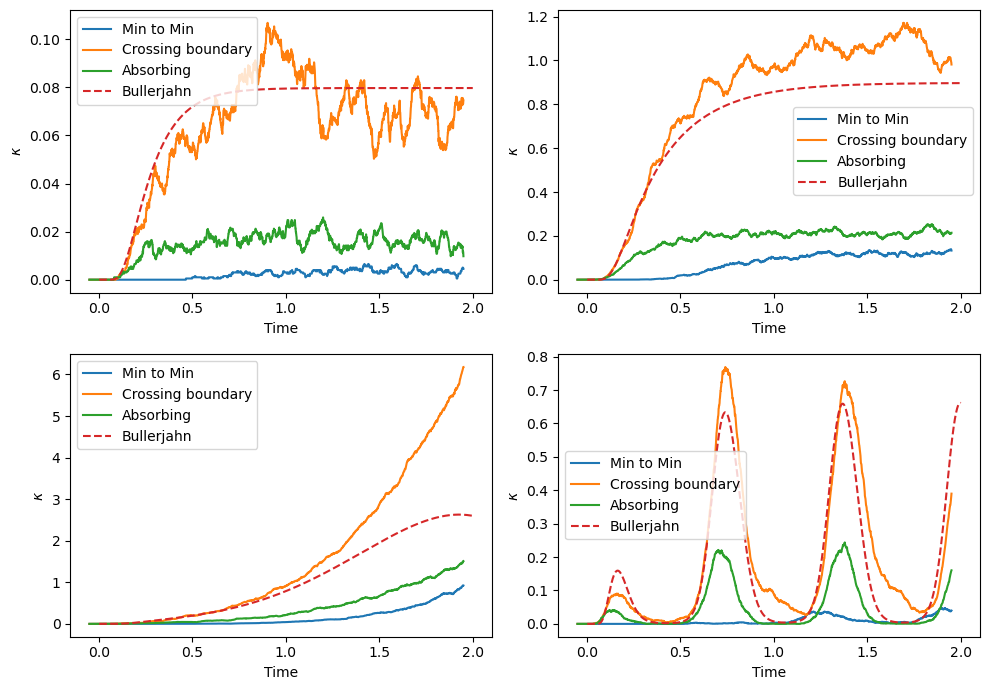

In [32]:
single_key = 'tau005'
fig, axs = plt.subplots(2,2,figsize = (10,7))
for sm, sz,sa, bull, ax in zip(sime_res_bound_min[single_key].values(),
                           sime_res_bound_zero[single_key].values(),
                           sim_res_abs[single_key].values(),
                           bullerjahn[single_key].values(),
                              axs.flatten()):
    ax.plot(time_s[single_key],sm, label='Min to Min')
    ax.plot(time_s[single_key],sz, label='Crossing boundary')
    ax.plot(time_s[single_key],sa, label='Absorbing')
    
    #ax.set_ylim(*ax.set_ylim())
    
    ax.plot(time_b[single_key],bull, label='Bullerjahn', ls = '--')
    ax.legend()
    # plt.yscale('log')
    ax.set_ylabel('$\kappa$')
    ax.set_xlabel('Time')
plt.tight_layout()
if save_run:
    plt.savefig(f'Graphic_Results/Different_rates_{single_key}.pdf')

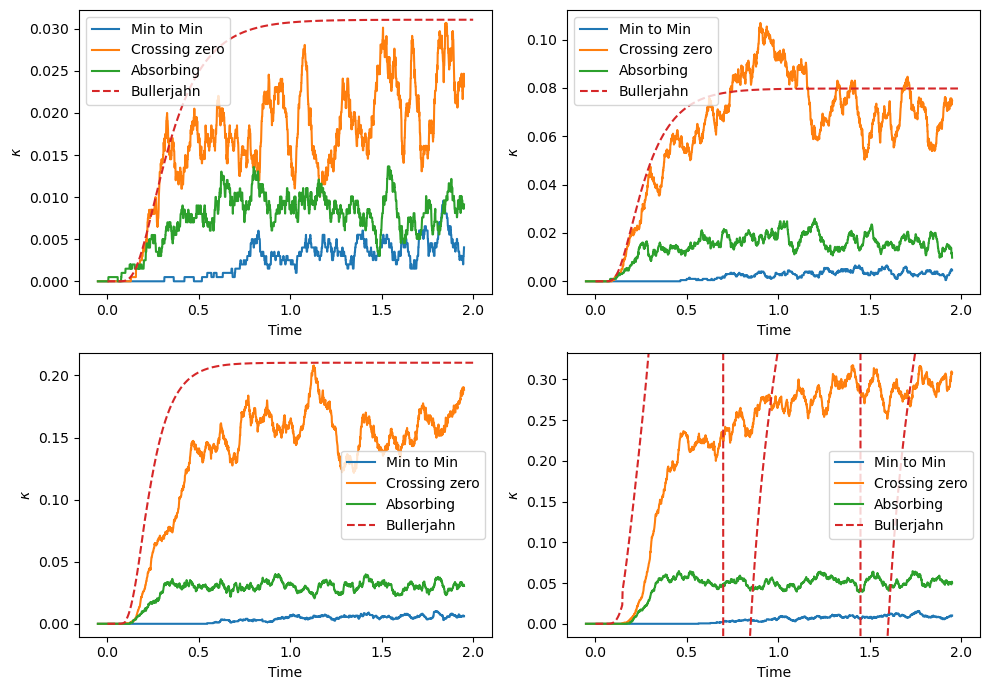

In [34]:
single_prot = 'no'

fig, axs = plt.subplots(2,2,figsize=(10,7))

for sm, sz,sa, bull,ax in zip(sime_res_bound_min.values(),
                           sime_res_bound_zero.values(),
                           sim_res_abs.values(),
                           bullerjahn.values(),
                          axs.flatten()):
    ax.plot(time_s[single_key],sm[single_prot], label='Min to Min')
    ax.plot(time_s[single_key],sz[single_prot], label='Crossing zero')
    ax.plot(time_s[single_key],sa[single_prot], label='Absorbing')
    
    ax.set_ylim(*ax.set_ylim())
    
    ax.plot(time_b[single_key],bull[single_prot], label='Bullerjahn', ls = '--')
    ax.legend()
    # plt.yscale('log')
    ax.set_ylabel('$\kappa$')
    ax.set_xlabel('Time')
plt.tight_layout()

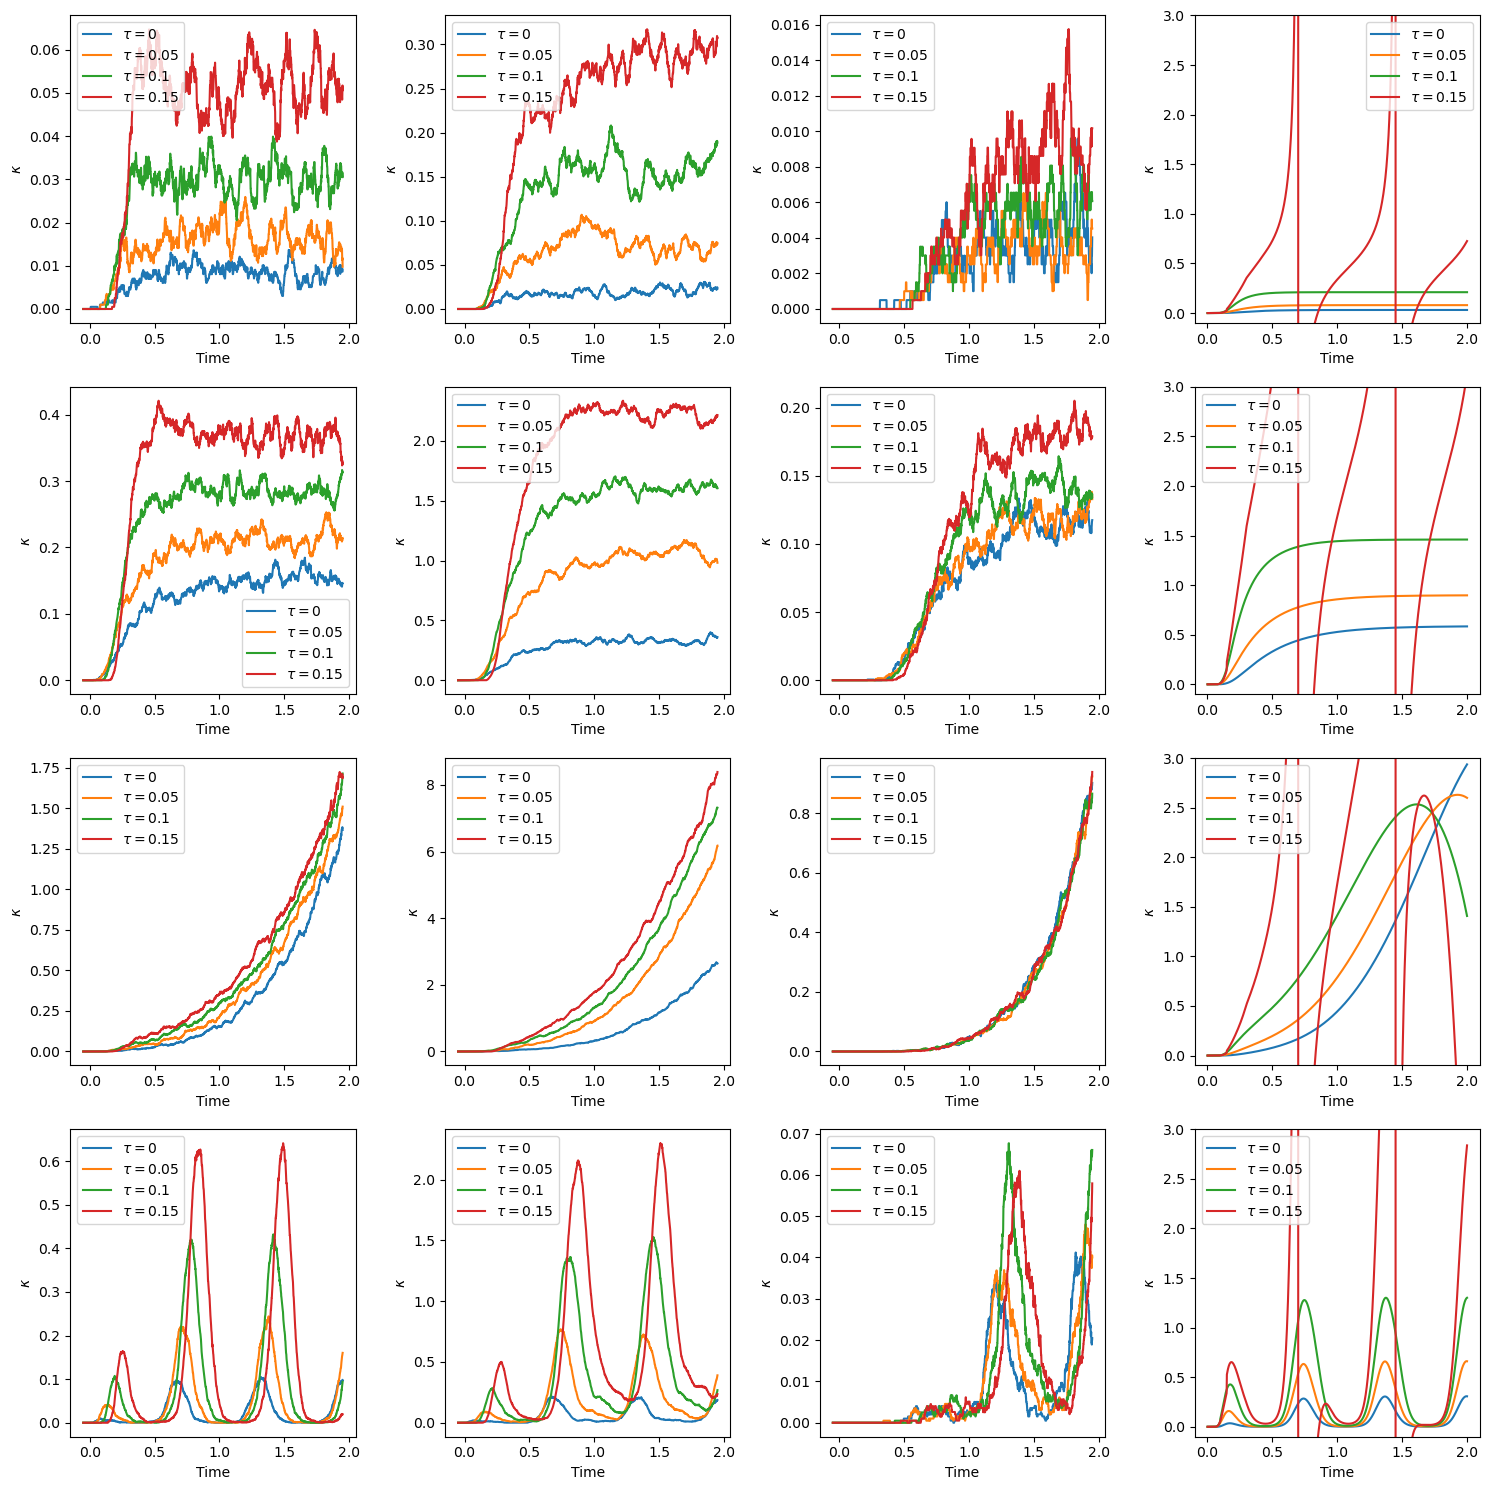

In [58]:
fig,axs = plt.subplots(4,4, figsize=(15,15))

label_dict = {
'tau0':r'$\tau = 0$',
'tau005':r'$\tau = 0.05$',
'tau01':r'$\tau = 0.1$',
'tau015':r'$\tau = 0.15$'}

datas = [sim_res_abs, sime_res_bound_zero,sime_res_bound_min, bullerjahn]
times = [time_s, time_s, time_s, time_b]
for this_prot, this_row in zip(sime_res_bound_min['tau0'].keys(), axs):
    for this_time, data,ax in zip(times, datas,this_row):
        for k,d in data.items():
            #plt.ylim(0,0.4)
            ax.plot(this_time[single_key],d[this_prot], label=label_dict[k])
            ax.legend()
            # plt.yscale('log')
            ax.set_ylabel('$\kappa$')
            ax.set_xlabel('Time')
    this_row[3].set_ylim(-0.1,3)
plt.tight_layout()
plt.savefig('Graphic_Results/ratesOfTau.pdf')